In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualization as vis

pd.set_option('display.max_columns', None)


In [22]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

In [23]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
0,Resort Hotel,False,342,27,0,0,2,0,0,BB,Portugal,Undefined,Direct,False,0,0,C,C,3,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
1,Resort Hotel,False,737,27,0,0,2,0,0,BB,Undefined,Undefined,Direct,False,0,0,Undefined,C,4,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
2,Resort Hotel,False,7,27,0,1,1,0,0,BB,United Kingdom,Undefined,Direct,False,0,0,A,C,0,Undefined,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
3,Resort Hotel,False,13,27,0,1,1,0,0,BB,United Kingdom,Corporate,Corporate,False,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
4,Resort Hotel,False,14,28,0,2,2,0,0,BB,Undefined,Online TA,TA/TO,False,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,False,2015-7-1


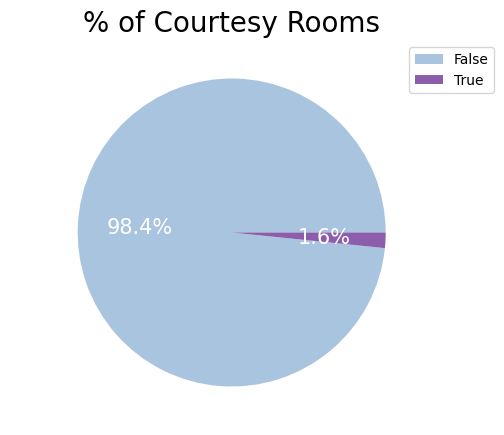

In [24]:
vis.pie(df['courtesy'].value_counts(), df['courtesy'].value_counts().index, 15, 'white', df, 'BuPu', '% of Courtesy Rooms', 'Black', 20, 0, (5,5))

El porcentaje de habitaciones que el hotel ofrece por cortesía (a coste 0 para los clientes) es del 1.6%. A pesar de su baja representación, no incluiremos esas habitaciones en el siguiente análisis al entender que su cancelación (o no) no afecta a los beneficios del hotel

In [25]:
df = df[df['courtesy'] == False]

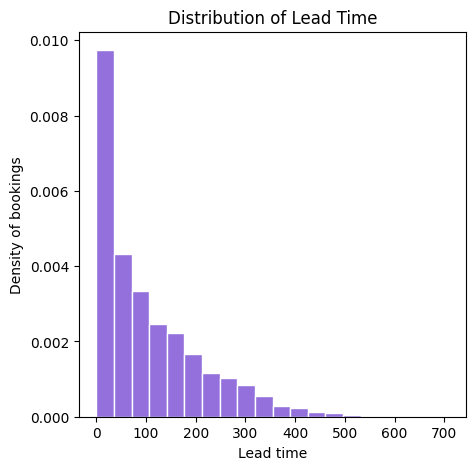

In [27]:
vis.hist('lead_time', df, 'mediumpurple', 'white', True, 20, 'Lead time' , 'Density of bookings', 'Distribution of Lead Time', (5,5))

Observamos que **la mayoría de reservas a los hoteles se realizan con una antelación de no más de 50 días**. Conforme el plazo entre la reserva y la llegada aumenta, el número de reservas disminuye considerablemente.

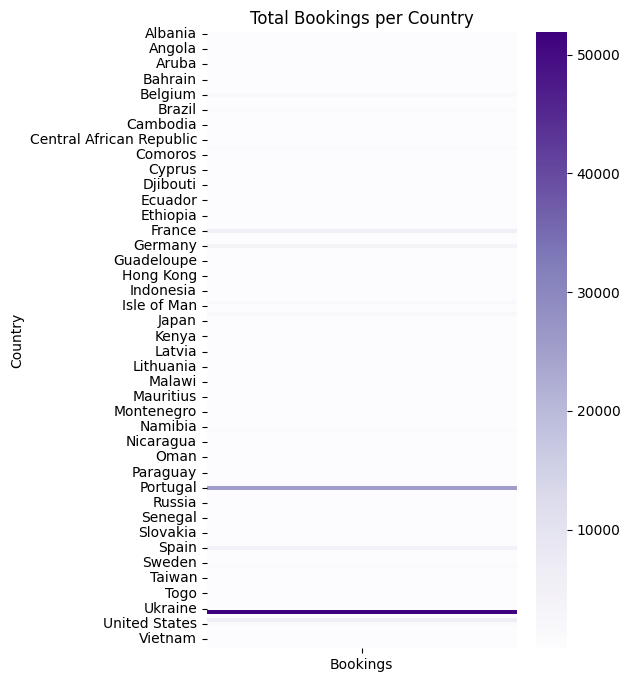

In [28]:
# Crea un DataFrame que contenga el número de reservas por país
heatmap_data = df['country'].value_counts().reset_index()
heatmap_data.columns = ['Country', 'Bookings']

# Crea el heatmap
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='Country', values='Bookings', aggfunc='sum'), cmap="Purples", annot=False, fmt='d')
heatmap.set_title('Total Bookings per Country')
heatmap.set_xlabel('')
heatmap.set_ylabel('Country');

**La mayoría de reservas provienen de Ucrania y Portugal**. A ambos países les siguen, de lejos, Francia, España, Alemania, Estados Unidos y Japón (todos ellos con menos de 2500 reservas).

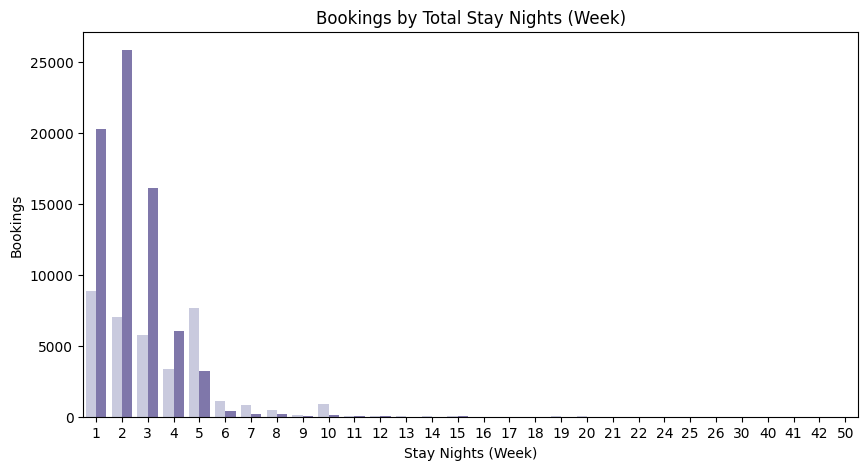

In [29]:
df_filtered1 = df[df['stays_in_week_nights'] != 0]

vis.countplot('stays_in_week_nights', df_filtered1, 'Purples', 'hotel', True, None, 'Stay Nights (Week)', 'Bookings', 'Bookings by Total Stay Nights (Week)', 0, (10,5))

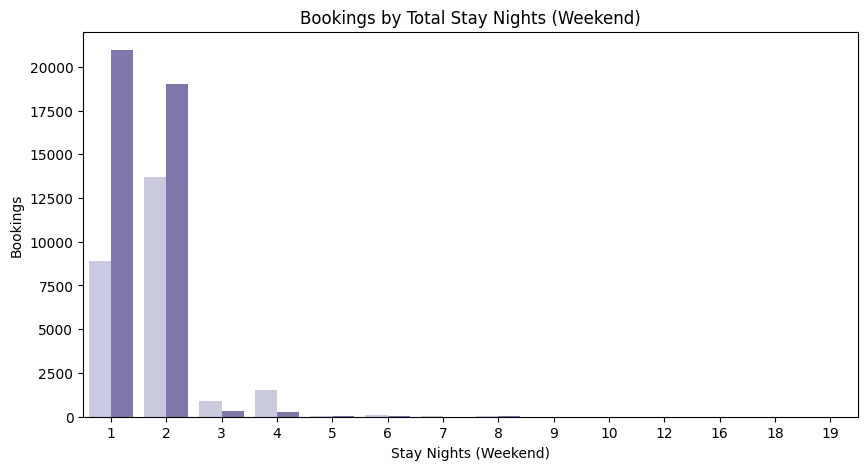

In [30]:
df_filtered2 = df[df['stays_in_weekend_nights'] != 0]

vis.countplot('stays_in_weekend_nights', df_filtered2, 'Purples', 'hotel', True, None, 'Stay Nights (Weekend)', 'Bookings', 'Bookings by Total Stay Nights (Weekend)', 0, (10,5))

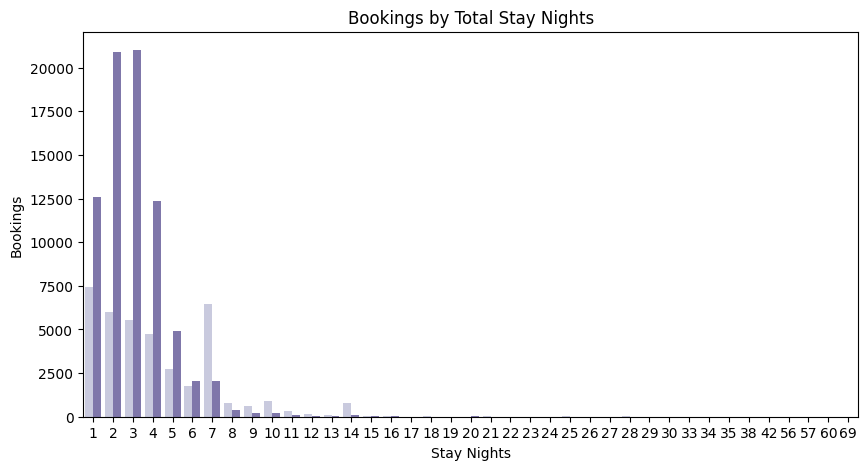

In [31]:
df_copy = df.copy()

df_copy['total_stay_nights'] = df_copy['stays_in_weekend_nights'] + df['stays_in_week_nights']

df_filtered3 = df_copy[df_copy['total_stay_nights'] != 0]

vis.countplot('total_stay_nights', df_filtered3, 'Purples', 'hotel', True, None, 'Stay Nights', 'Bookings', 'Bookings by Total Stay Nights', 0, (10,5))

En total los clientes suelen reservar entre 1 y 4 noches en los hoteles. Sí se aprecian diferencias respecto al hotel:
- Resort Hotel: Las reservas suelen durar entre 1 y 5 noches, siendo ambos extremos los más reservados. Existe diferencia entre el número de días entre semana (mayor) y el fin de semana (menor)
- City Hotel: Las reservas suelen durar entre 2 y 3 noches. No existe diferencia significativa entre el número de días entre semanay el fin de semana

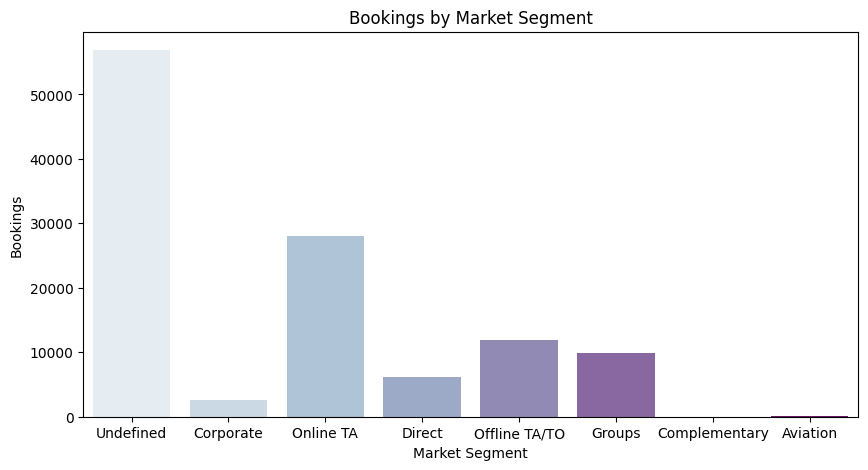

In [33]:
vis.countplot('market_segment', df, 'BuPu', 'market_segment', True, None, 'Market Segment', 'Bookings', 'Bookings by Market Segment', 0, (10,5))

Un elevado número de nuestros datos no tienen un segmento de mercado definido. Sería recomendable tratar de recoger la información de un modo en el que no se perdieran tantos datos. Aún así, respecto a la información de la que disponemos: La mayoría de reservas pertenecen al segmeneto de mercado Online TA.

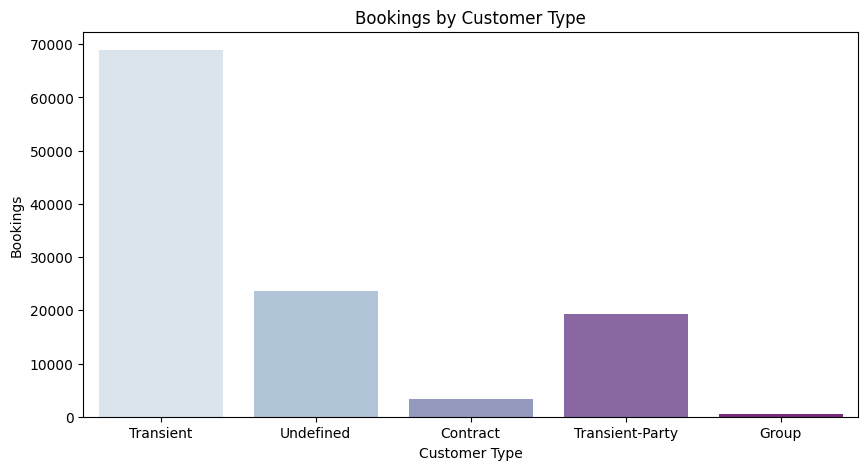

In [34]:
vis.countplot('customer_type', df, 'BuPu', 'customer_type', True, None, 'Customer Type', 'Bookings', 'Bookings by Customer Type', 0, (10,5))

En este caso se observa que la mayoría de clientes pertenecen a la categoría de **transient**, entendido como "un tipo de cliente que realiza reservas individuales y que no forma parte de un grupo o contrato a largo plazo". 

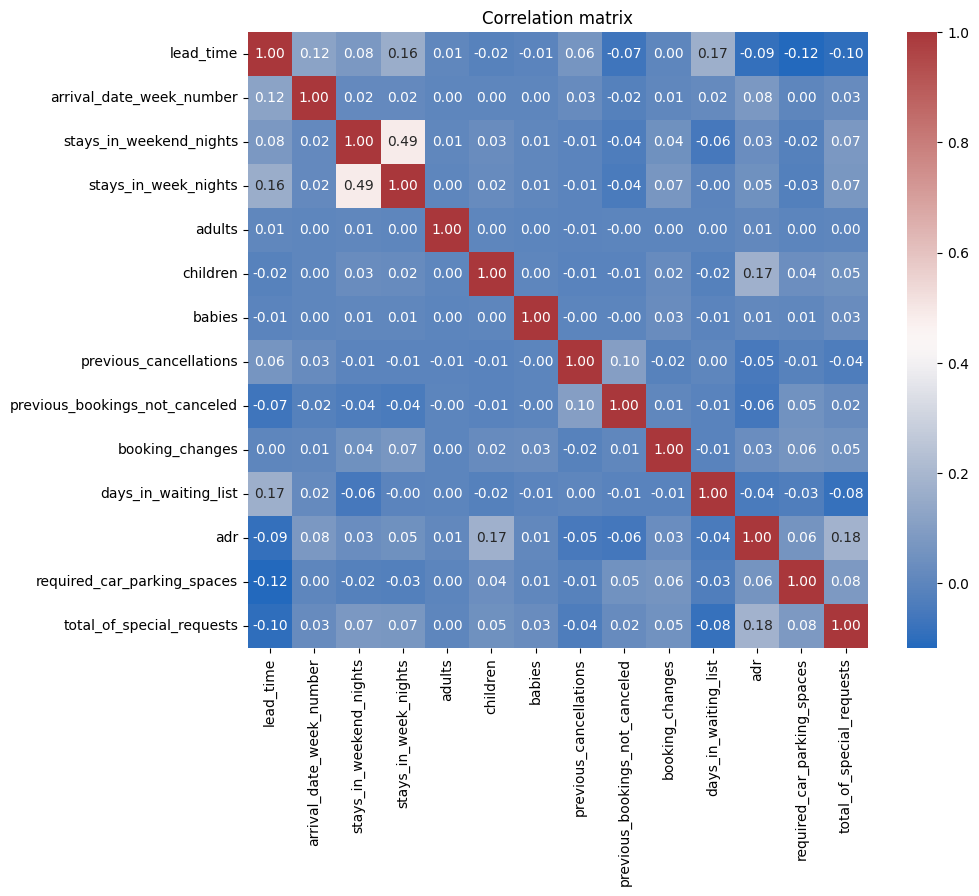

In [41]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f")
plt.title('Correlation matrix');

Según el gráfico de correlación, existe una relación moderada positiva entre las variables `stays_in_weekend_nights` y `stays_in_week_nights`. Cuando una aumenta, la otra tiende a aumentar también.
Otras correlaciones positivas interesantes, aunque débiles, son:
- `lead_time` y `days_in_waiting_list`
- `lead_time`y `stays_in_week_nights`
- `children` y `adr`
- `adr` y `total_of_special_requests`

### Resumen

Basándonos en las observaciones proporcionadas, podemos crear un perfil general del cliente del hotel:

**Anticipación en la reserva:**

La mayoría de los clientes tienden a reservar con una antelación de no más de 50 días. Esto sugiere que muchos clientes prefieren planificar sus viajes con relativamente poca anticipación.

**Origen de las reservas:**

La mayoría de las reservas provienen de Ucrania y Portugal, seguidas por Francia, España, Alemania, Estados Unidos y Japón, aunque en menor cantidad. Esto indica una diversidad en la base de clientes, pero con una concentración significativa de reservas de algunos países específicos.

**Duración de las estancias:**

En general, los clientes suelen reservar entre 1 y 4 noches en los hoteles. Sin embargo, hay diferencias entre los tipos de hoteles:

- Para los Resort Hotels, las estancias suelen durar entre 1 y 5 noches, con una diferencia entre los días de semana y los fines de semana.
- Para los City Hotels, las estancias suelen durar entre 2 y 3 noches, sin diferencia significativa entre los días de semana y los fines de semana.

**Segmento de mercado y tipo de cliente:**

La mayoría de las reservas no tienen un segmento de mercado definido, pero entre los que están definidos, el segmento de mercado más común es Online Travel Agencies (TA). Además, la mayoría de los clientes pertenecen al tipo de cliente "transient", lo que sugiere que son viajeros individuales que no forman parte de un grupo o contrato a largo plazo.

**Correlaciones interesantes:**

Existe una correlación moderada positiva entre las variables stays_in_weekend_nights y stays_in_week_nights, lo que indica que cuando una aumenta, la otra tiende a aumentar también.

Otras correlaciones positivas, aunque débiles, incluyen lead_time y days_in_waiting_list, lead_time y stays_in_week_nights, children y adr, y adr y total_of_special_requests.

El perfil general del cliente del hotel se caracteriza por reservas realizadas con poca anticipación, una base diversa de clientes con una concentración significativa de algunos países, estancias de corta duración con diferencias entre tipos de hoteles, predominio de reservas a través de Online Travel Agencies, y clientes principalmente del tipo *transient*. 

### Análisis sobre Cancelaciones

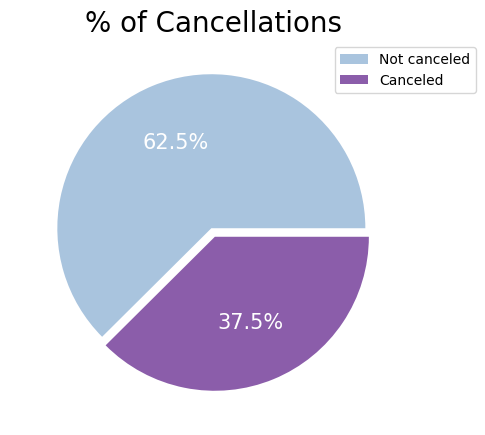

In [43]:
vis.pie(df['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

El porcentaje de cancelaciones es de **37,5%**, un número que podría considerarse relativamente alto. Para conocer el motivo tras ese resultado, primero realizaremos un análisis general de los datos y en base al mismo iremos profundizando en distintas variables.

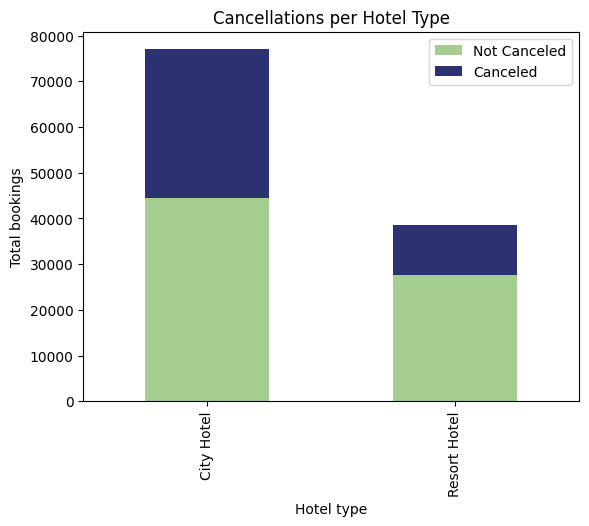

In [59]:
cancelaciones_por_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()

cancelaciones_por_hotel.plot(kind='bar',
                             stacked=True, 
                             colormap='crest')
plt.xlabel('Hotel type')
plt.ylabel('Total bookings')
plt.title('Cancellations per Hotel Type')
plt.legend(['Not Canceled', 'Canceled'], loc='upper right');

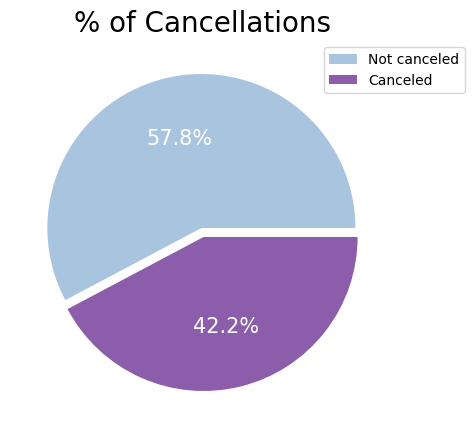

In [83]:
df_city_hotel = df[df['hotel'] == 'City Hotel']

vis.pie(df_city_hotel['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df_city_hotel, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

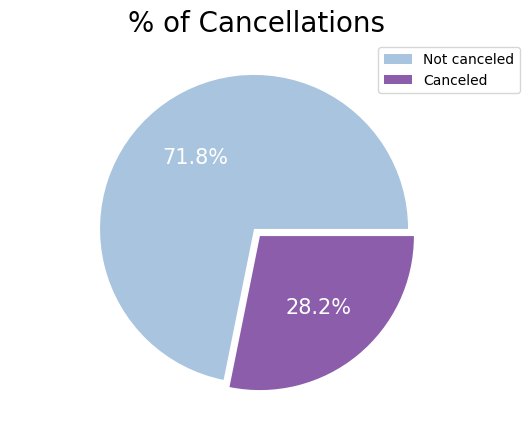

In [85]:
df_resort_hotel = df[df['hotel'] == 'Resort Hotel']

vis.pie(df_resort_hotel['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df_resort_hotel, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))